## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('grades.csv')

In [6]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
grade    100 non-null float64
dtypes: float64(1)
memory usage: 840.0 bytes


In [7]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


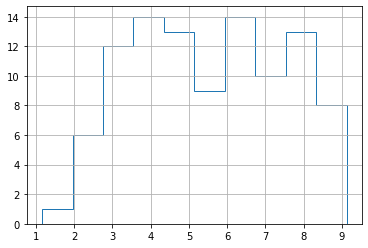

In [8]:
pop.grade.hist(histtype='step')

In [9]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [10]:
# obtain replacable samples of 100 from the dataframe 
pop.sample(100, replace = True).describe()

,grade
count,100.000000
mean,5.760409
std,1.921621
min,1.987371
25%,4.424040
50%,5.949652
75%,7.477510
max,9.120705


In [11]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100, replace = True).grade.mean() for i in range(1000)]})

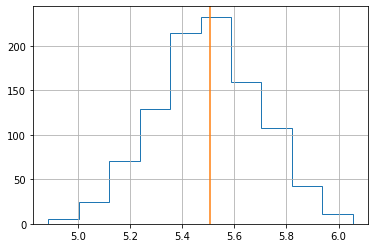

In [12]:
bootstrap.meangrade.hist(histtype = 'step')
pp. axvline(pop.grade.mean(),color = 'C1')

In [13]:
# CI of meangrade is 95% between 5.11 and 5.90
bootstrap.meangrade.quantile(0.025),bootstrap.meangrade.quantile(0.975)

(5.098190613693805, 5.896572966780248)

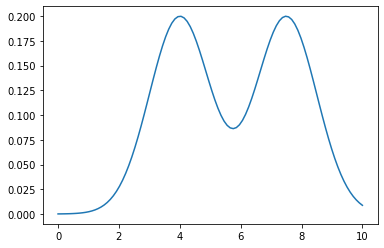

In [14]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [15]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [16]:
draw()

4.1623792427104185

In [17]:
def dataset(n = 100):
    return pd.DataFrame({'grade':[draw() for i in range(n)]})

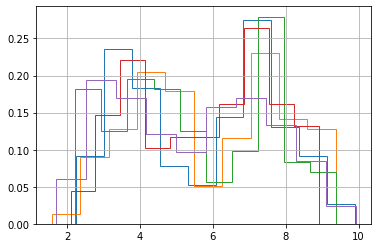

In [18]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density = True)

In [19]:
means = pd.DataFrame({'meangrade':[dataset(100).grade.mean() for i in range(1000)]})

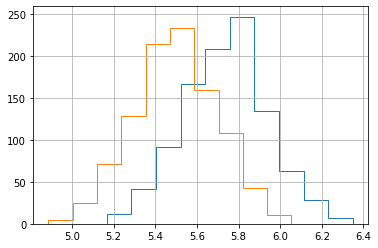

In [21]:
means.meangrade.hist(histtype = 'step')
bootstrap.meangrade.hist(histtype = 'step')